In [1]:
%pylab inline

import xlrd
import numpy as np
import scipy as sp

import scipy.optimize as spo

Populating the interactive namespace from numpy and matplotlib


In [2]:
HEADER   = ['клетка 1', "Area", "XM", "YM", "XStart", "YStart"]
NEW_CELL = ['клетка 2', '', '', '', '', '']

def is_header(row):
    for i, cell in enumerate(row):
        if HEADER[i] != cell.value:
            return False
    return True

def is_empty(row):
    for cell in row:
        if cell.value:
            return False
    return True

def is_new_cell(row):
    for i, cell in enumerate(row):
        if NEW_CELL[i] != cell.value:
            return False
    return True

def parse_sheet(sheet):
    data = []
    cell = []
    track = []
    
    assert is_header(sheet.row(0))
    
    for pos in range(1, sheet.nrows):
        row = sheet.row(pos)
        if is_empty(row):
            if track:
                cell.append(np.array(track))
                track = []
        elif is_new_cell(row):
            if track:
                cell.append(np.array(track))
                track = []

            data.append(cell)
            cell = []
        else:
            track.append(list(map(lambda cell: float(cell.value), row)))
    if track:
        cell.append(np.array(track))
        track = []

    if cell:
        data.append(cell)
        
    return data

def parse_new_tracks(book):
    data = []
    for sheet in book.sheets():
        data.extend(parse_sheet(sheet))
    return data

In [3]:
book = xlrd.open_workbook('./data/tracks_new.xls')
data = parse_new_tracks(book)

print('Data Length: {}'.format(len(data)))
for cell in data:
    print('\tCell Length: {}'.format(len(cell)))        

Data Length: 8
	Cell Length: 20
	Cell Length: 21
	Cell Length: 10
	Cell Length: 11
	Cell Length: 15
	Cell Length: 7
	Cell Length: 10
	Cell Length: 10


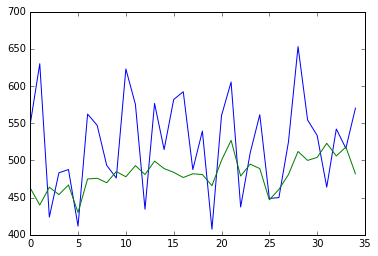

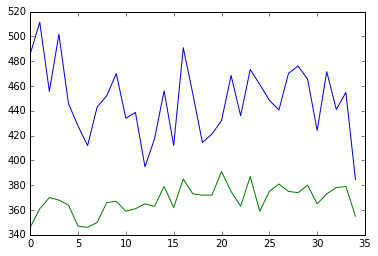

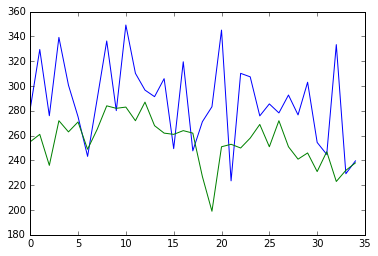

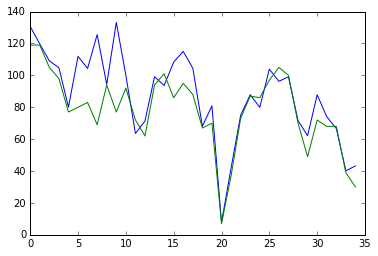

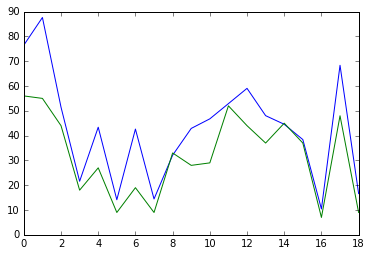

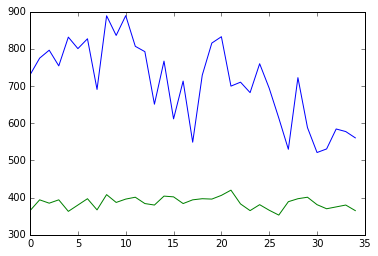

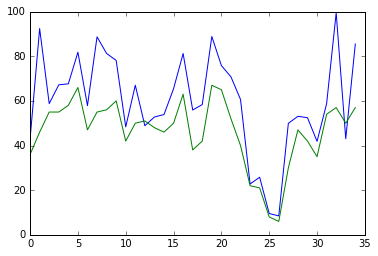

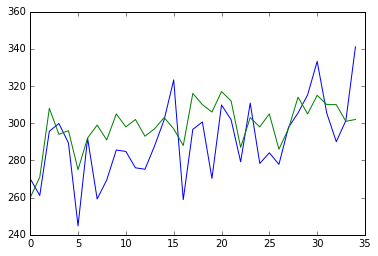

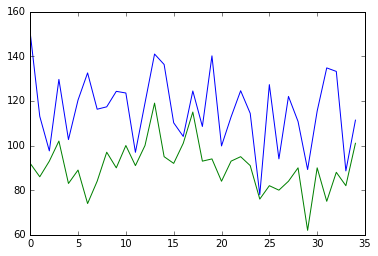

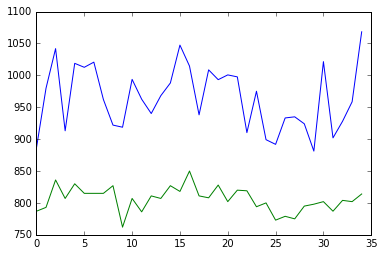

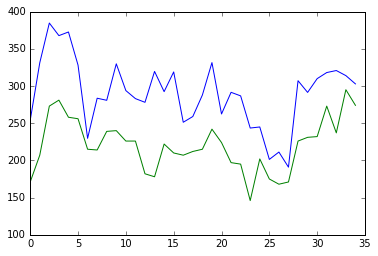

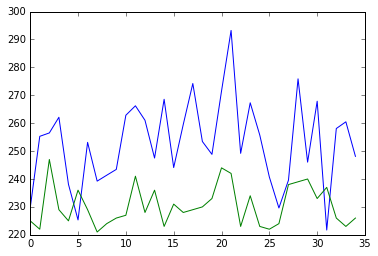

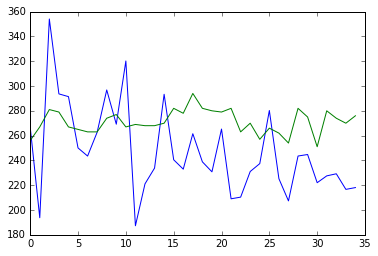

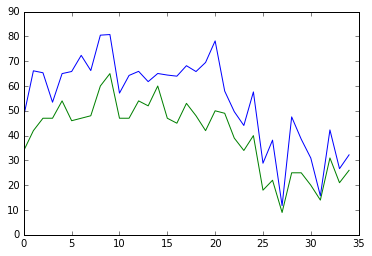

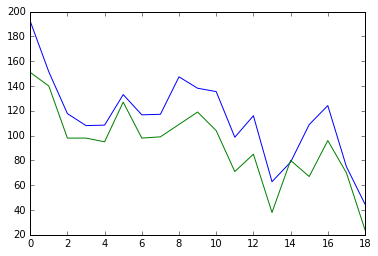

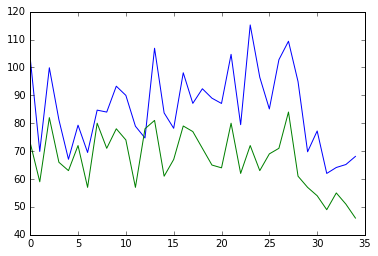

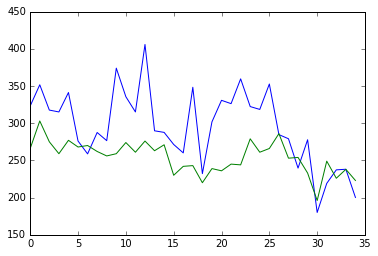

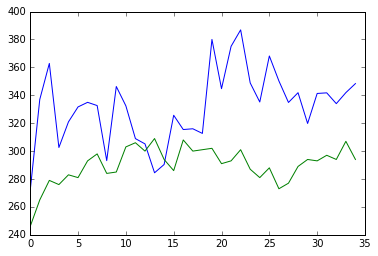

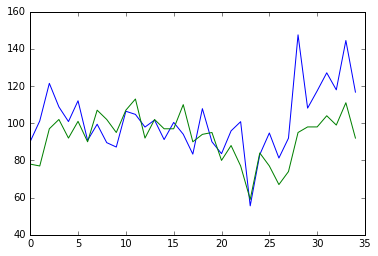

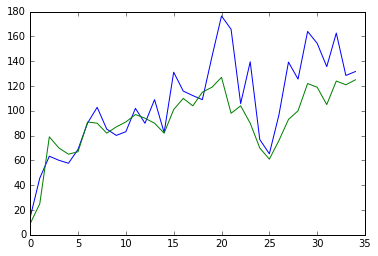

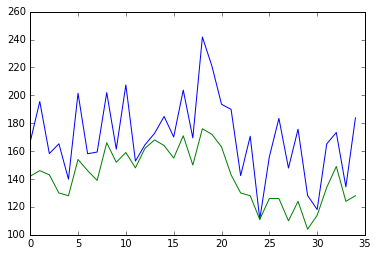

In [4]:
cell = data[1]

for track in cell:
    szs = np.pi * np.sum((track[:, 2:4] - track[:, 4:6]) ** 2, 1)
    plot(arange(len(szs)), szs)
    plot(arange(len(szs)), track[:, 1])
    show()

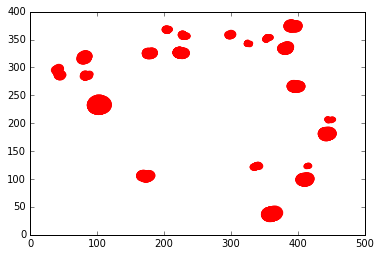

In [5]:
cell = data[1]

fig, ax = plt.subplots()
for track in cell:
    szs = np.pi * np.sum((track[:, 2:4] - track[:, 4:6]) ** 2, 1)
    for i in range(track.shape[0]):
        ax.add_artist(Circle(track[i, 2:4], np.sqrt(track[i, 1] / np.pi), color='r'))
    scatter(track[:, 2], track[:, 3], s=np.sqrt(track[:, 1] / np.pi))
show()

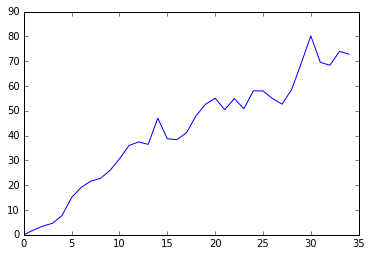

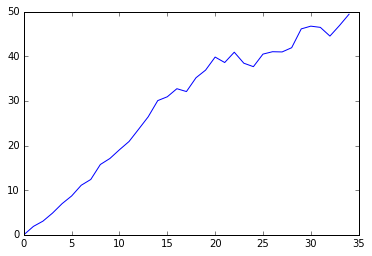

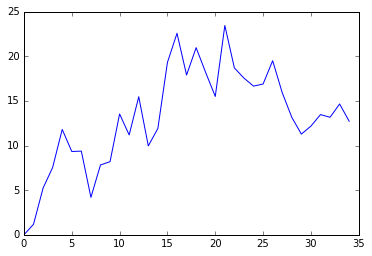

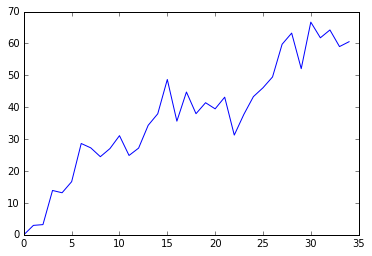

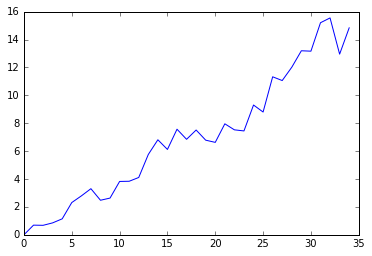

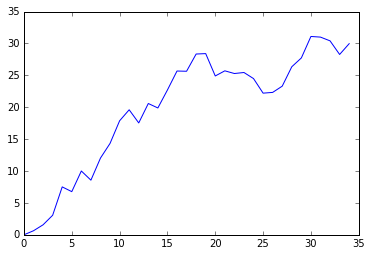

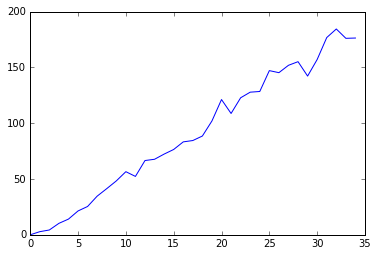

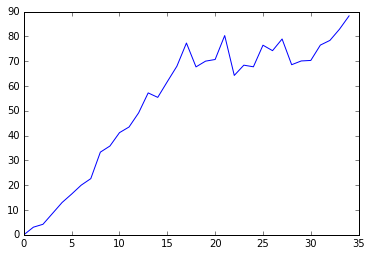

In [6]:
for cell in data:
    length = np.amax(list(map(lambda track: track.shape[0], cell)))

    ys, ss = [], []
    for i in range(35):
        cur = []
        for track in cell:
            if track.shape[0] > i:
                cur.append(np.sum((track[0, 2:4] - track[i, 2:4]) ** 2))
        ys.append(np.mean(cur))
        ss.append(len(cur))
    plot(arange(len(ys)), ys)
    figure()

[ 1.24550169  0.20701162]


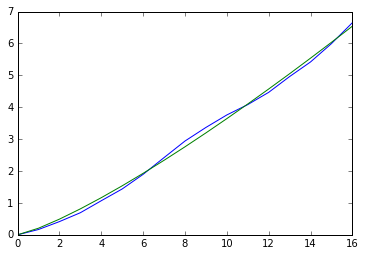

[ 1.39984116  0.28157868]


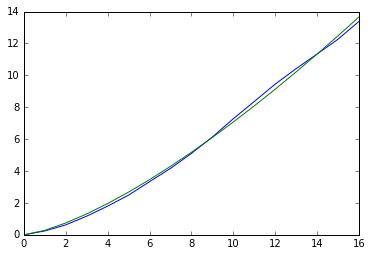

[ 1.64101586  0.30956263]


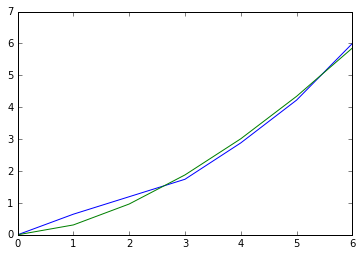

[ 1.4745466   0.18480224]


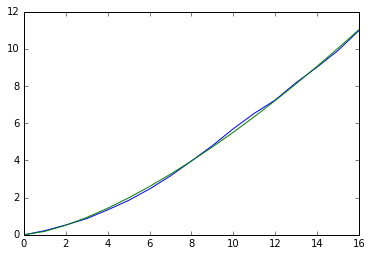

[ 1.29661436  0.26360469]


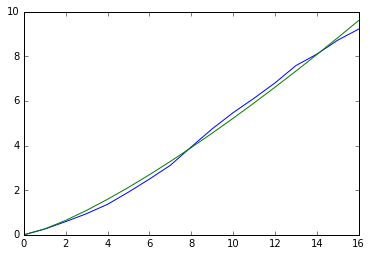

[ 0.98001019  0.48204624]


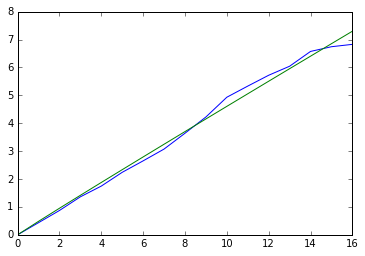

[ 1.55497997  0.30520792]


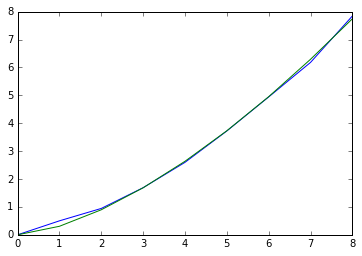

[ 1.36084351  0.21431894]


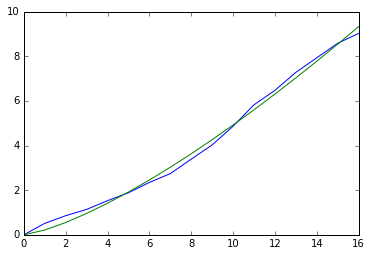

[ 1.52463234  0.34320295]


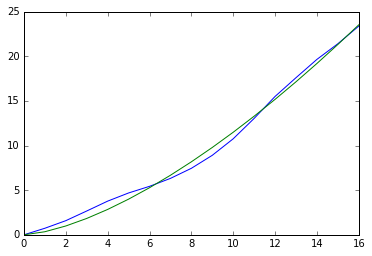

[ 0.79662788  0.92633874]


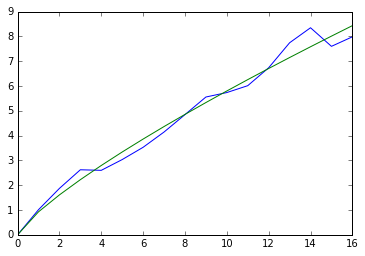

[ 1.09245604  0.8711368 ]


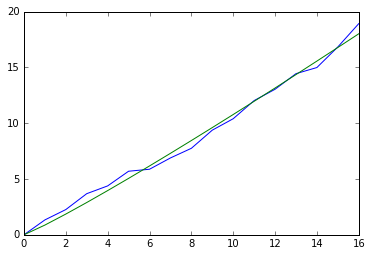

[ 0.84410372  0.53465213]


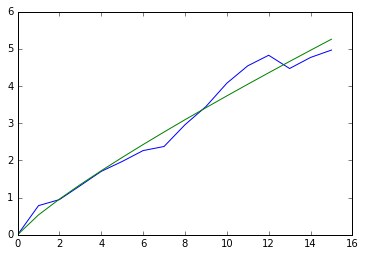

[ 0.72771071  1.13480228]


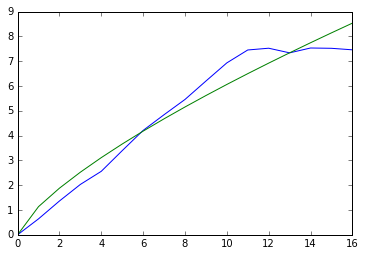

[ 0.98724651  0.44555425]


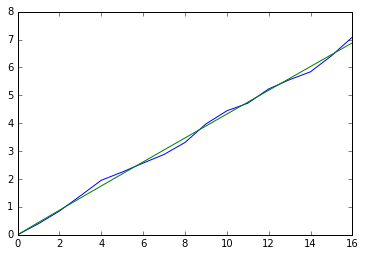

[ 1.36974098  0.35976122]


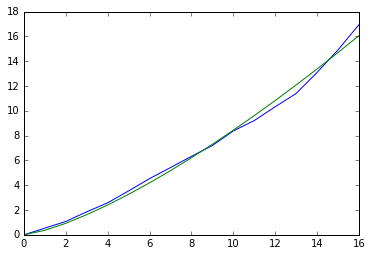

[ 1.69833198  0.14280841]


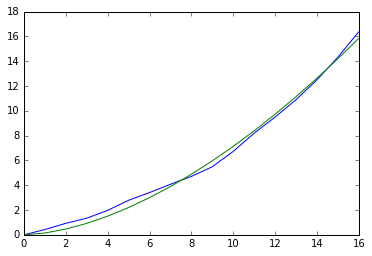

[ 0.63407979  1.35883203]


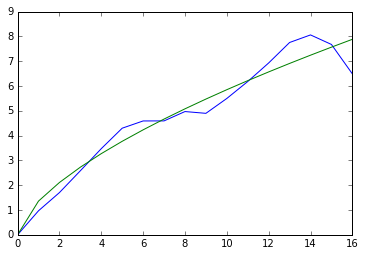

[ 0.75621413  1.5225873 ]


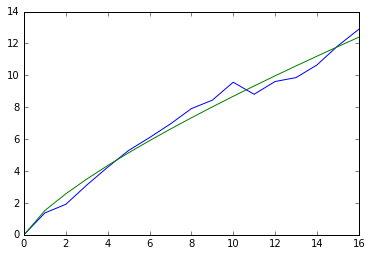

[ 1.55861253  0.54480173]


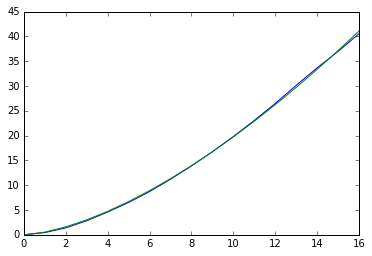

[  0.52109868  12.36456877]


/home/george/envs/mlenv/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


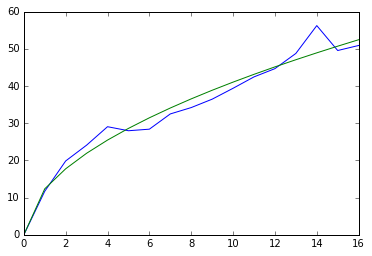

[ 1.12805382  0.33639072]


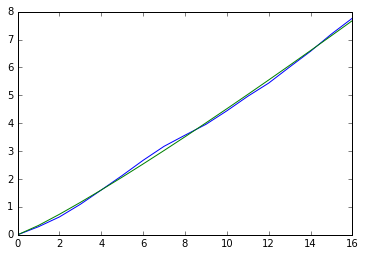

[ 1.13095451  0.24194   ]


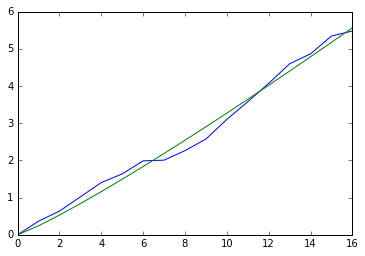

[ 1.60756956  0.24303839]


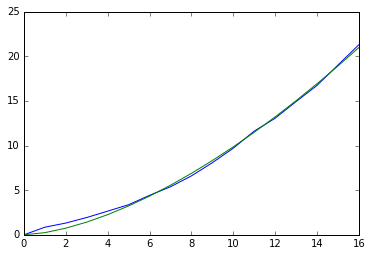

[ 1.5443906   0.20687464]


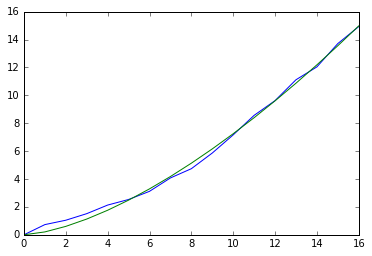

[ 0.51958336  1.44598103]


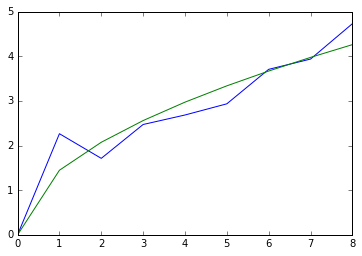

[ 1.16526236  0.23660196]


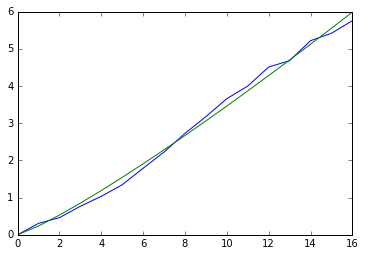

[ 1.33067499  0.44229061]


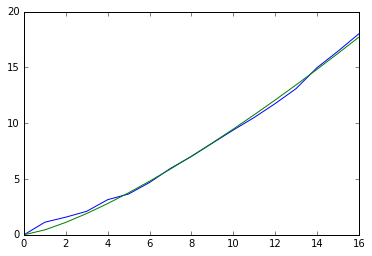

[ 1.22169781  0.44023555]


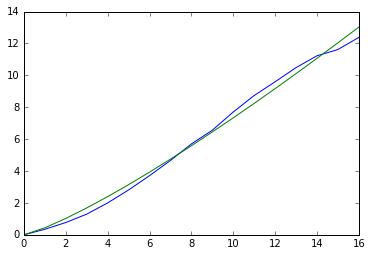

[ 0.91662523  1.63956862]


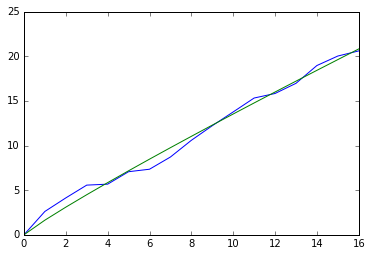

[ 0.27590825  1.30355842]


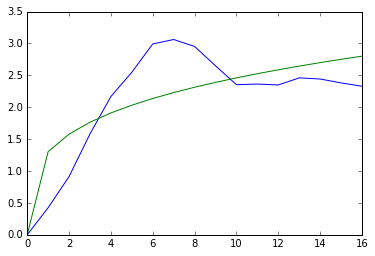

[ 1.07665149  1.10531207]


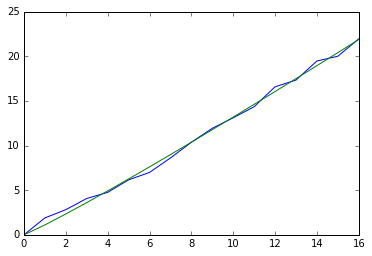

[ 1.16577547  0.33435852]


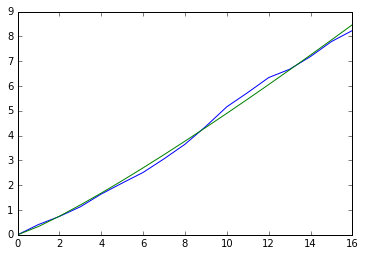

[ 1.0866528   0.42738106]


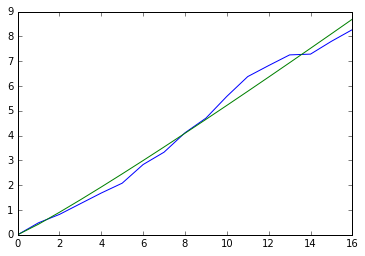

[ 0.88155209  0.8591872 ]


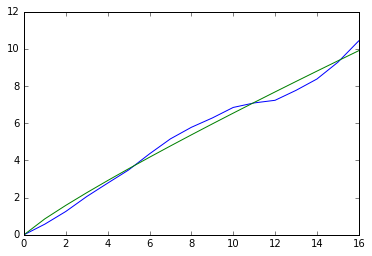

[ 1.0580783  0.8420569]


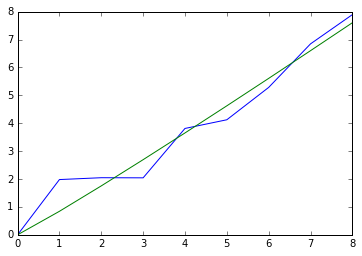

[ 0.84377977  1.00699523]


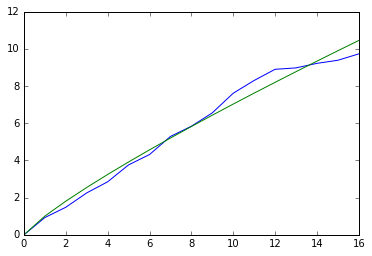

[ 1.22464112  0.33675789]


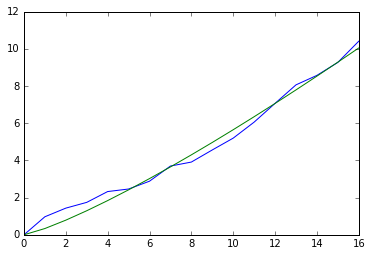

[ 1.10620616  0.96319427]


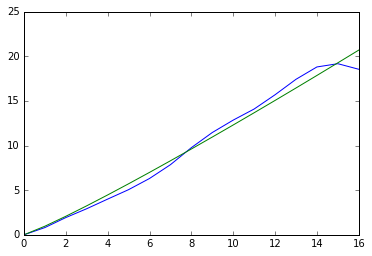

[ 0.4272916   1.11969557]


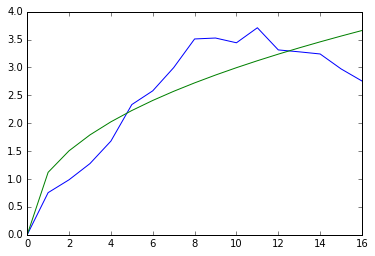

[ 1.48677382  0.3256887 ]


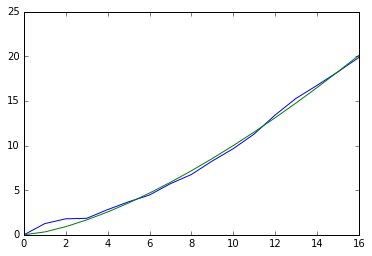

[ 1.39366345  1.74439229]


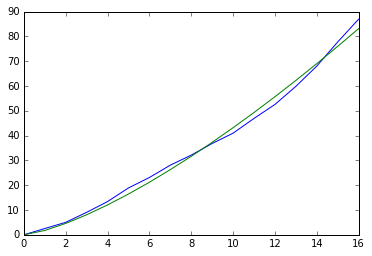

[  0.21487933  15.09102381]


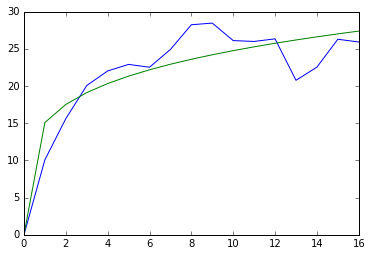

[ 1.13765931  0.44552998]


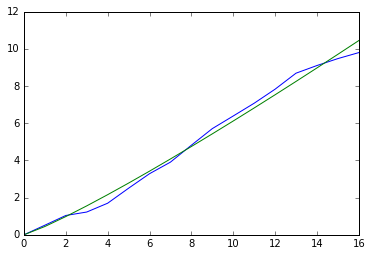

[ 1.31308592  0.11711424]


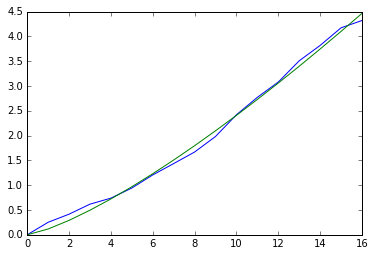

[ 0.94285724  0.42186384]


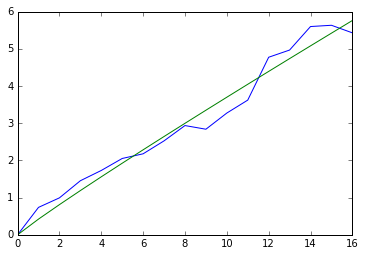

[ 1.13621782  0.15545179]


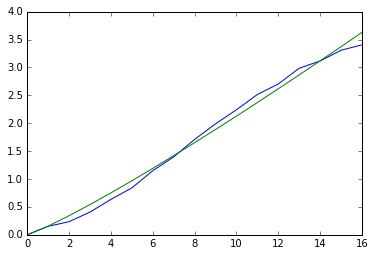

[ 0.41209048  1.89974719]


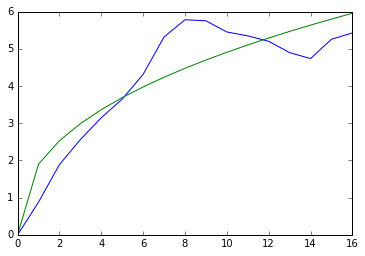

[ 1.01004884  0.60137982]


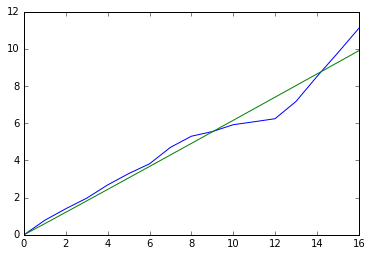

[ 0.75552951  0.63192367]


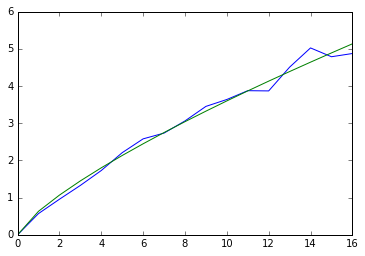

[ 1.29428095  0.10423675]


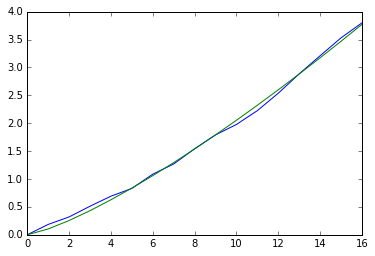

[ 0.53588484  2.5208571 ]


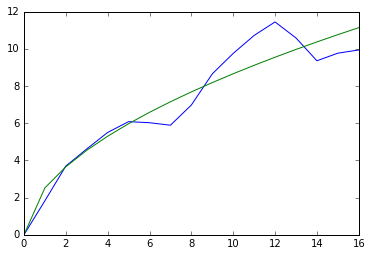

[ 0.80603593  5.5171072 ]


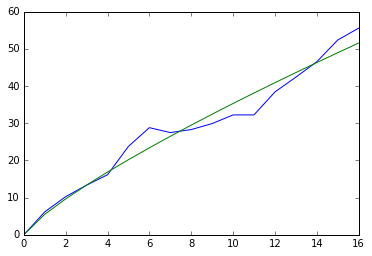

[ 1.14630091  0.47183769]


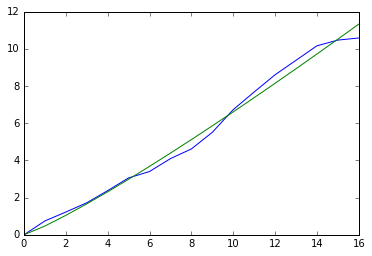

[ 1.34821621  0.1503886 ]


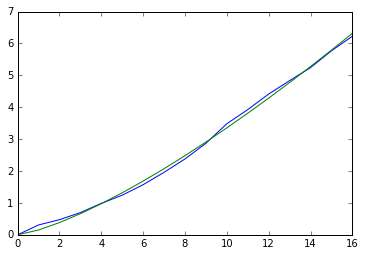

[ 1.11791088  0.14998049]


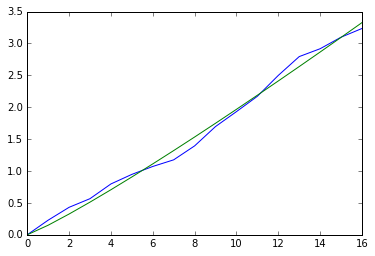

[ 0.85145929  0.81995202]


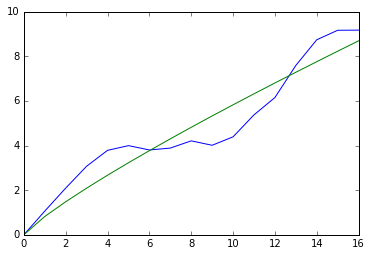

[ 0.59854043  0.68010656]


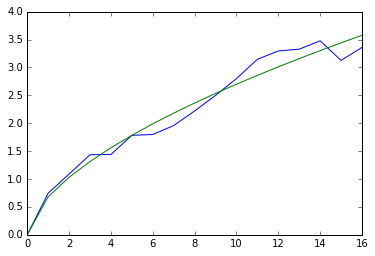

[ 1.07693462  0.24967428]


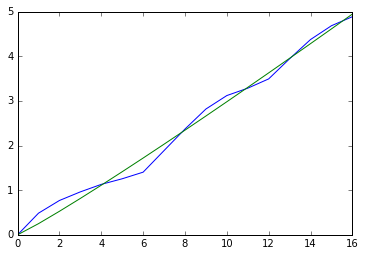

[ 0.36331357  8.12698908]


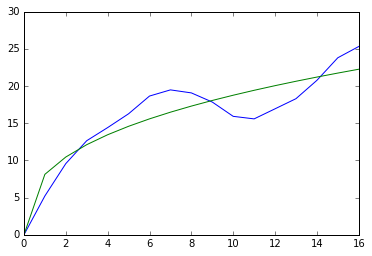

[ 0.96866011  0.27865168]


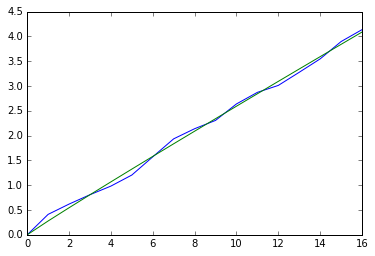

[ 0.89914802  1.66553683]


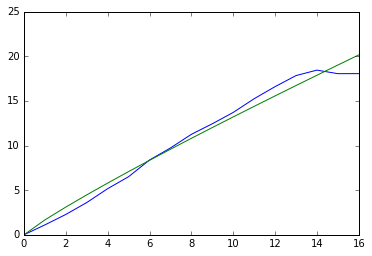

[  0.28507759  13.97293484]


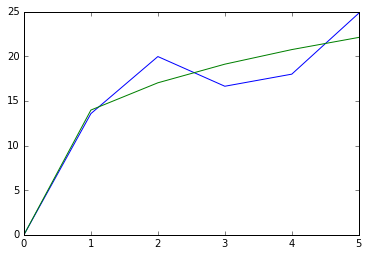

[ 0.83874299  0.45201572]


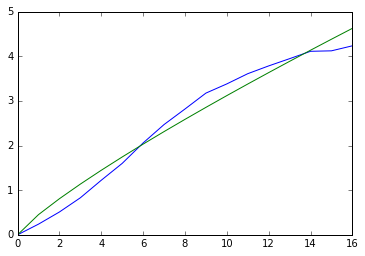

[ 0.75416481  0.11656994]


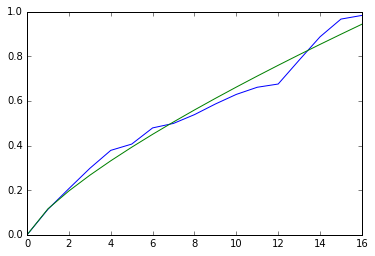

[ 0.64160444  0.24772052]


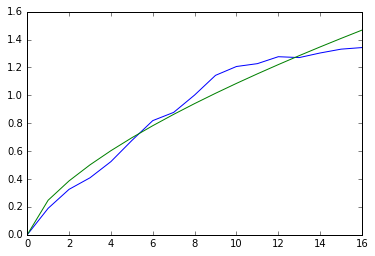

[ 0.72279832  0.82297815]


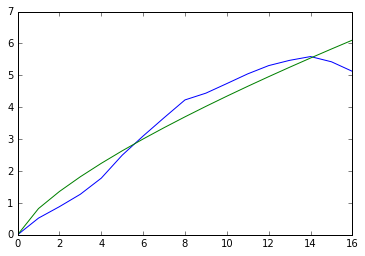

[ 0.40117559  0.59761424]


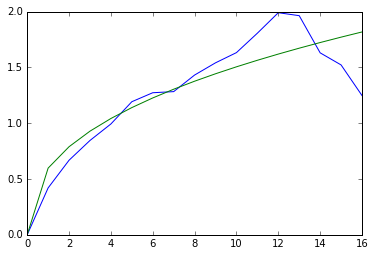

[ 0.42992608  0.81070247]


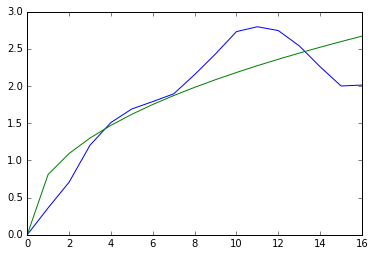

[ 0.27790309  1.67176188]


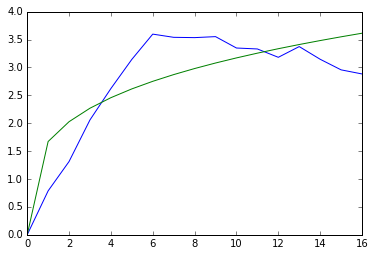

[ 0.28089801  2.38172693]


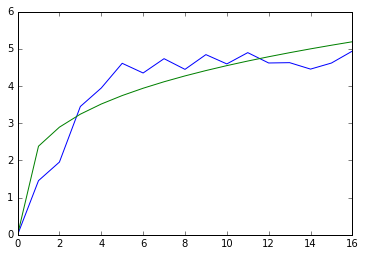

[ 1.12091217  0.31091494]


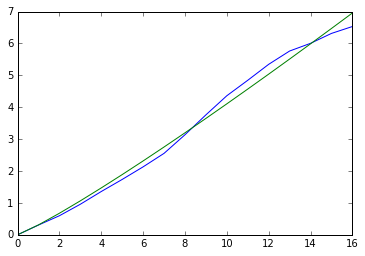

[ 0.86093533  0.19173086]


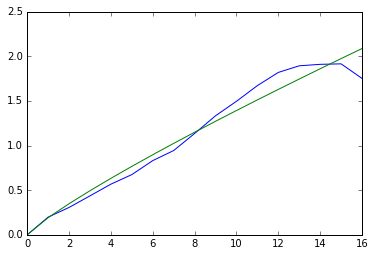

[ 0.84729801  0.90492939]


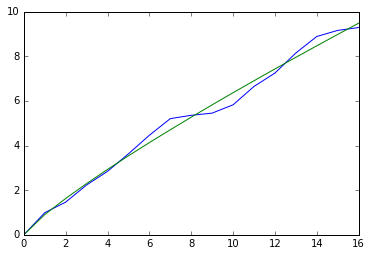

[ 1.44980055  0.23466719]


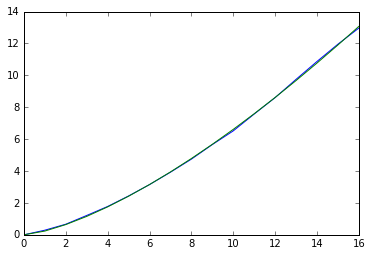

[ 0.44743755  0.27060447]


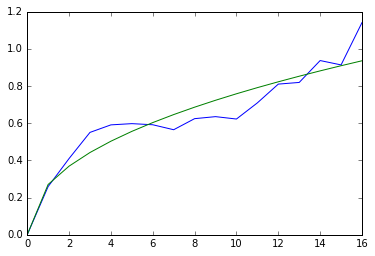

[ 1.31351518  0.66560483]


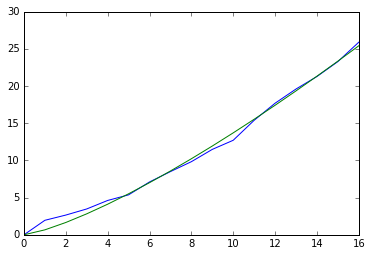

[ 1.02672785  0.50510979]


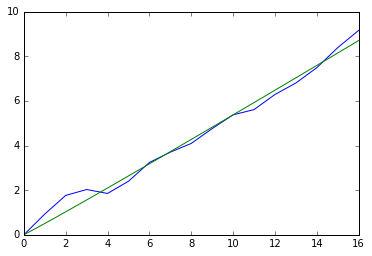

[ 0.39054329  2.1865321 ]


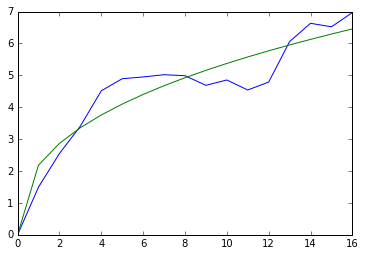

[ 0.89454015  1.25431491]


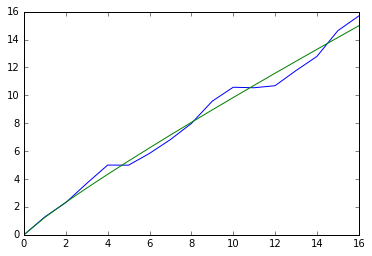

[ 1.06032456  0.46417562]


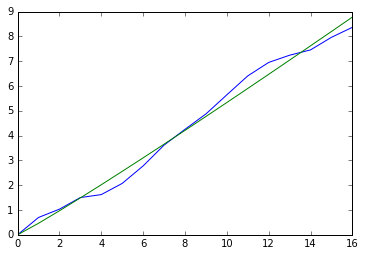

[ 1.53581601  0.18750285]


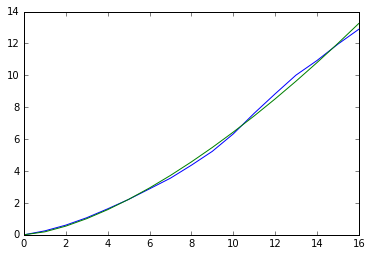

[ 1.35181529  0.12350579]


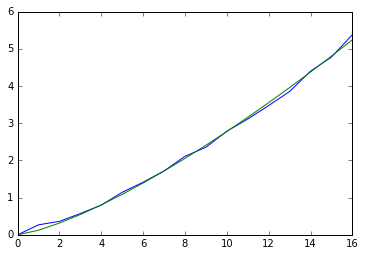

[ 0.86260065  0.36812136]


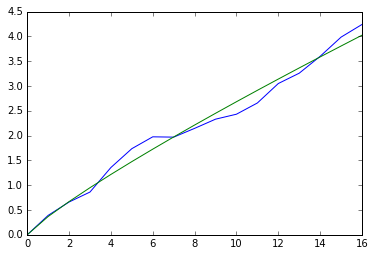

[ 0.65597148  0.3809865 ]


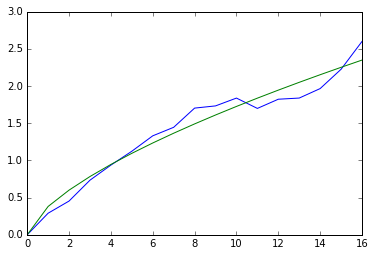

[ 1.35618117  0.34689913]


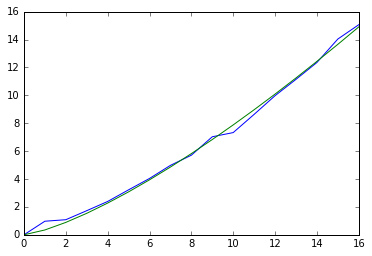

[ 1.90986608  0.09572338]


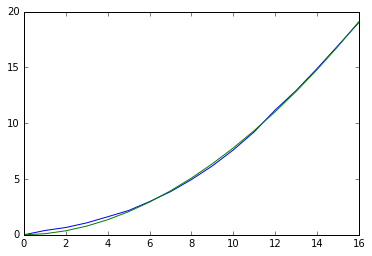

[ 0.64633745  1.05643698]


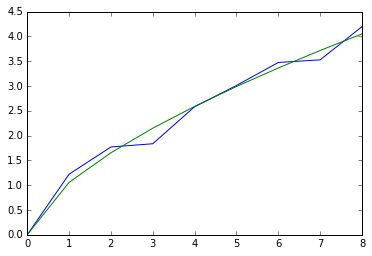

[ 1.85735375  0.236751  ]


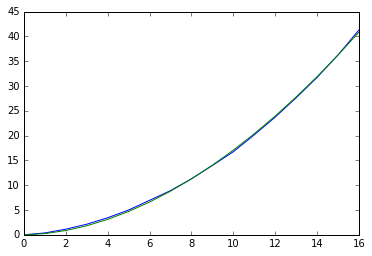

[ 1.70912044  0.50796819]


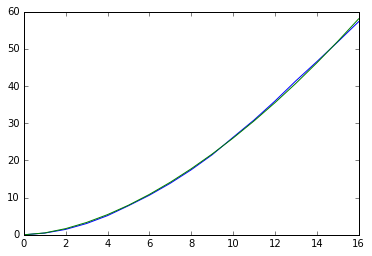

[ 0.91247644  3.53627429]


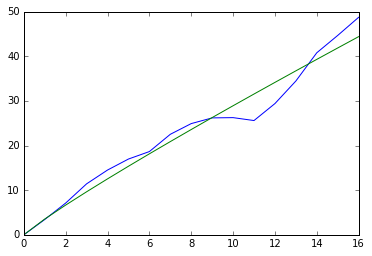

[ 0.90390368  3.69972362]


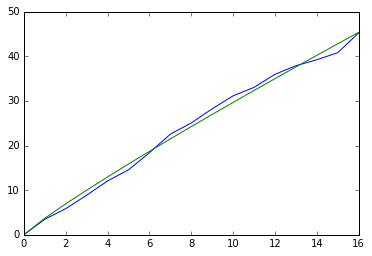

[ 1.49227219  0.47592113]


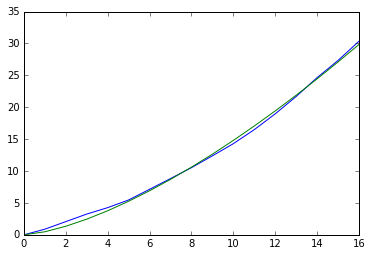

[ 1.65469117  0.50332341]


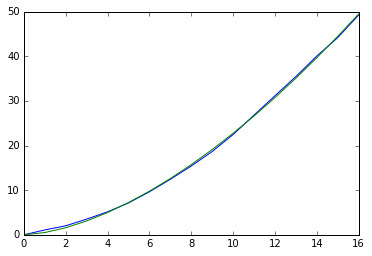

[ 1.14835099  1.592635  ]


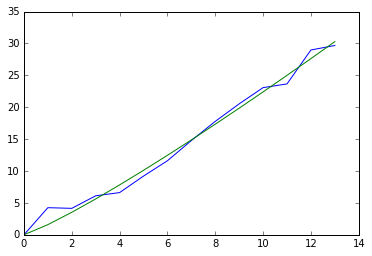

[ 1.58908788  0.4702471 ]


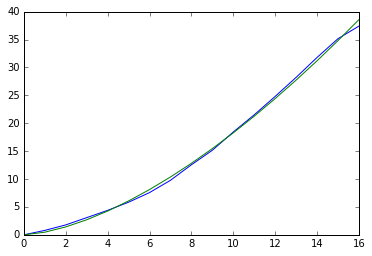

[ 1.2784529   1.31003827]


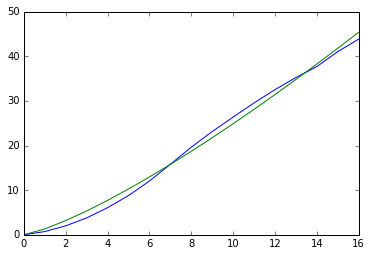

[ 1.40011951  2.06095084]


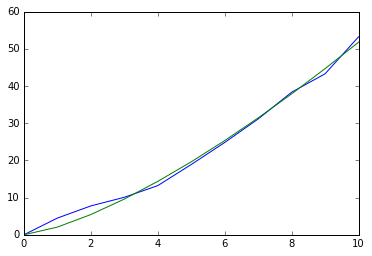

[ 1.69374648  0.24646677]


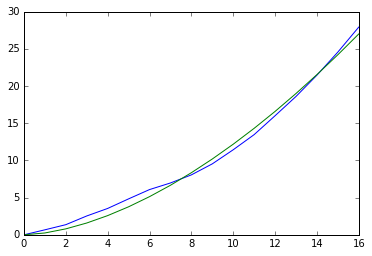

[ 0.93510744  1.51883779]


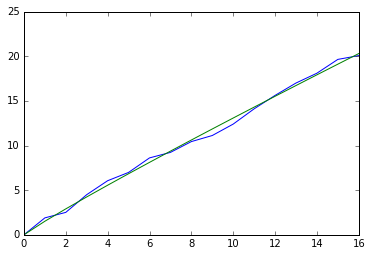

[ 0.41688815  2.37355909]


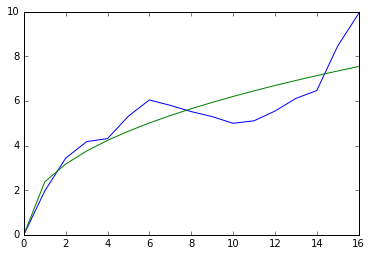

[ 0.28738746  4.53522279]


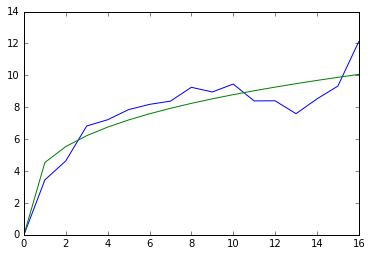

[ 1.21532227  0.39856154]


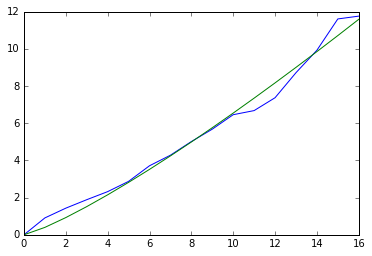

[ 0.84409     1.13616546]


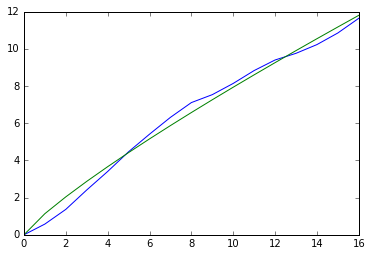

[ 1.07809129  0.70796092]


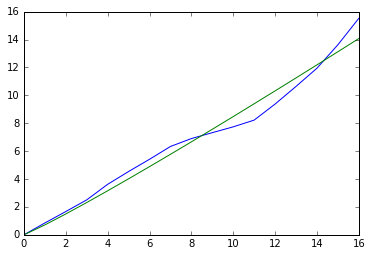

In [7]:
def t_function(x, alpha, beta):
    return beta * x**alpha

for cell in data:
    for track in cell:
        ys, ss = [], []
        for i in range(track.shape[0]):
            cur = []
            for j in range(track.shape[0] - i):
                cur.append(np.sum((track[j, 2:4] - track[j + i, 2:4]) ** 2))
            ys.append(np.mean(cur))
            ss.append(len(cur))
        ys = np.array(ys)
        
        xs = arange(len(ys))[:len(ys) // 2]
        ys = ys[xs]
            
        popt, _ = spo.curve_fit(t_function, xs, ys, [1, 1])
        
        print(popt)
        plot(xs, ys)
        plot(xs, t_function(xs, *popt))
        show()